In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

### Data Understanding 

In [3]:
Company=pd.read_csv('Company_Data.csv')
Company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
Company.shape

(400, 11)

In [5]:
Company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
Company['ShelveLoc'].unique(),Company['Urban'].unique(),Company['US'].unique()

(array(['Bad', 'Good', 'Medium'], dtype=object),
 array(['Yes', 'No'], dtype=object),
 array(['Yes', 'No'], dtype=object))

In [7]:
Company.insert(11,'Salsevalue','')

In [8]:
Company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Salsevalue
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,


In [9]:
for i in range(0,len(Company['Sales'])):
    if Company['Sales'][i]>=11.0:
        Company['Salsevalue'][i]='High'
    elif Company['Sales'][i]<=6.0:
        Company['Salsevalue'][i]='Low'
    else:
        Company['Salsevalue'][i]='Medium'

In [10]:
Company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Salsevalue
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [11]:
Company['Salsevalue'].value_counts()

Medium    221
Low       130
High       49
Name: Salsevalue, dtype: int64

In [12]:
Company=pd.get_dummies(Company,columns=['Population','Price','ShelveLoc','Age','Education','Urban','US'])

In [13]:
Company.head()

,Sales,CompPrice,Income,Advertising,Salsevalue,Population_10,Population_12,Population_13,Population_14,Population_16,...,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,Medium,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1,11.22,111,48,16,High,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,10.06,113,35,10,Medium,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,7.40,117,100,4,Medium,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,4.15,141,64,3,Low,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [14]:
Company1=Company.drop('Salsevalue',axis=1)
Company1.head()

,Sales,CompPrice,Income,Advertising,Population_10,Population_12,Population_13,Population_14,Population_16,Population_17,...,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1,11.22,111,48,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,10.06,113,35,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,7.40,117,100,4,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,4.15,141,64,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [15]:
le=LabelEncoder()
Company2=le.fit_transform(Company['Salsevalue'])

In [16]:
Company2=pd.DataFrame(Company2).rename({0:'Salsevalue'},axis=1)
Company2

,Salsevalue
0,2
1,0
2,2
3,2
4,1
...,...
395,0
396,2
397,2
398,1


In [17]:
Company3=pd.concat([Company1,Company2],axis=1)
Company3

,Sales,CompPrice,Income,Advertising,Population_10,Population_12,Population_13,Population_14,Population_16,Population_17,...,Education_14,Education_15,Education_16,Education_17,Education_18,Urban_No,Urban_Yes,US_No,US_Yes,Salsevalue
0,9.50,138,73,11,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,2
1,11.22,111,48,16,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,10.06,113,35,10,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,2
3,7.40,117,100,4,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,2
4,4.15,141,64,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
396,6.14,139,23,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,2
397,7.41,162,26,12,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,2
398,5.94,100,79,7,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1


### Imbalance Check:

<AxesSubplot:xlabel='Salsevalue', ylabel='count'>

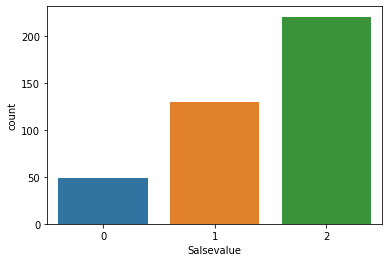

In [18]:
sns.countplot(Company3['Salsevalue'])

### Model Building:

In [19]:
x=Company3.drop(['Salsevalue'],axis=1)
y=Company3['Salsevalue']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
dt_model = DecisionTreeClassifier()
model1=dt_model.fit(x_train,y_train)

In [21]:
y_predict=model1.predict(x_train)

In [22]:
print(classification_report(y_train,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00       106
           2       1.00      1.00      1.00       176

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



### Hyperparameter Tuning
### Grid Search CV

In [23]:
from scipy.stats import randint

In [24]:
param_dist={'max_depth':(1,2,3,4,5,6,7,None),'criterion':['gini','entropy']}

In [25]:
tree_cv=GridSearchCV(dt_model,param_dist)

In [26]:
Gridsearch=tree_cv.fit(x_train,y_train)

In [27]:
Gridsearch.best_params_

{'criterion': 'gini', 'max_depth': 2}

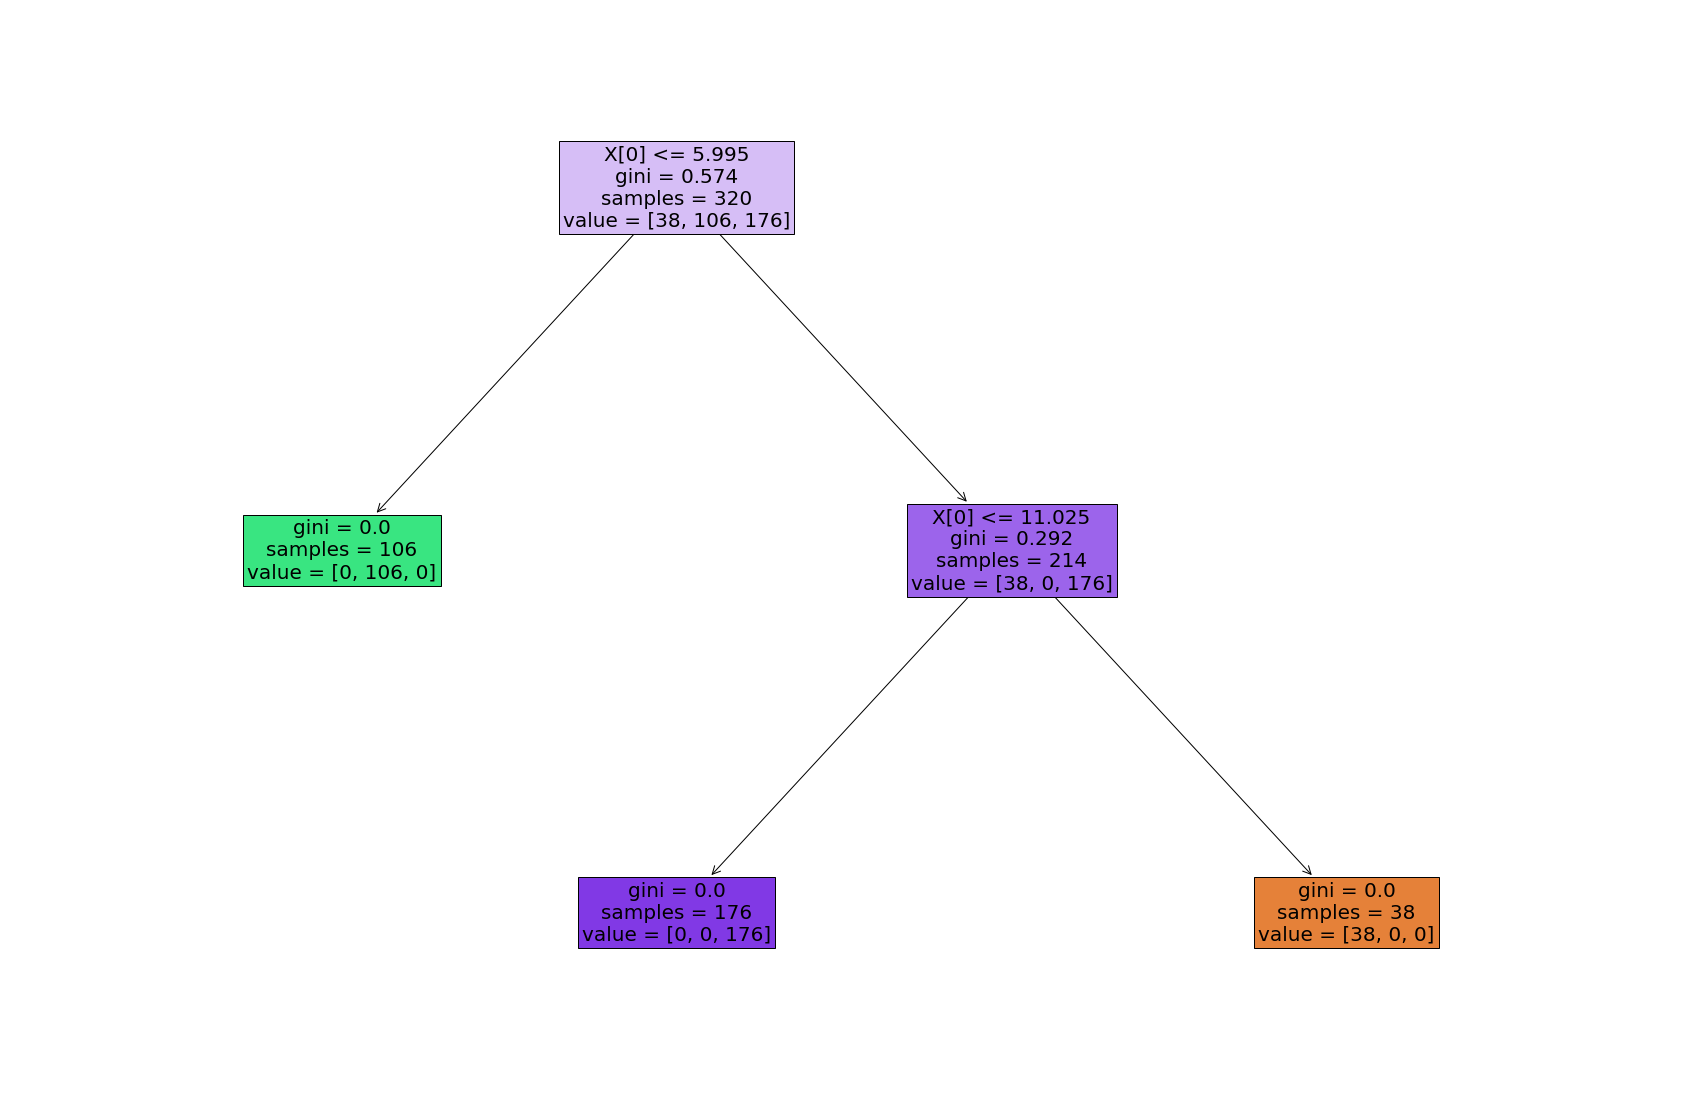

In [28]:
from sklearn import tree
plt.figure(figsize=(30,20))
tree.plot_tree(model1,filled=True,max_depth=2,impurity='gini',fontsize=20)
plt.show()